## Funciones útiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
aux1 = np.arange(-3,3,0.1)
aux2 = np.arange(1,4,0.05)
aux3 = 30 + 2*aux1 - 1.5*np.log(aux2) + 2*np.random.normal(size=len(aux1))
Datos = pd.DataFrame({'Y': aux3, 'X1': aux1, 'X2': aux2})
Datos.head(10)

,Y,X1,X2
0,21.282708,-3.0,1.00
1,24.900500,-2.9,1.05
2,25.116918,-2.8,1.10
3,26.249211,-2.7,1.15
4,21.550458,-2.6,1.20
5,24.425801,-2.5,1.25
6,23.561595,-2.4,1.30
7,23.962403,-2.3,1.35
8,22.312126,-2.2,1.40
9,25.918379,-2.1,1.45


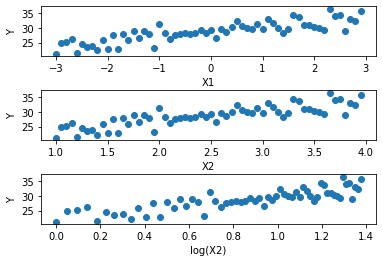

In [2]:
plt.subplot(3,1,1)
plt.scatter(Datos['X1'], Datos['Y'])
plt.xlabel('X1')
plt.ylabel('Y')
plt.subplot(3,1,2)
plt.scatter(Datos['X2'], Datos['Y'])
plt.xlabel('X2')
plt.ylabel('Y')
plt.subplot(3,1,3)
plt.scatter(np.log(Datos['X2']), Datos['Y'])
plt.xlabel('log(X2)')
plt.ylabel('Y')
plt.subplots_adjust(hspace=0.7)
plt.show()

In [3]:
modelo = smf.ols('Y ~ X1 + np.log(X2)', data = Datos)
result = modelo.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     69.02
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           5.94e-16
Time:                        19:05:53   Log-Likelihood:                -122.67
No. Observations:                  60   AIC:                             251.3
Df Residuals:                      57   BIC:                             257.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.1738      3.124      8.058      0.000      18.918      31.429
X1             0.7515      0.820      0.916      0.363      -0.891       2.393
np.log(X2)     4.1867      3.673      1.140      0.259      -3.169      11.542
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.586
Skew:                           0.016   Prob(JB):                        0.746
Kurtosis:                       2.517   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ANOVA

In [4]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,502.902028,502.902028,136.740363,8.941326e-17
np.log(X2),1.0,4.777833,4.777833,1.299105,2.591438e-01
Residual,57.0,209.633900,3.677788,NaN,NaN


### Predicción

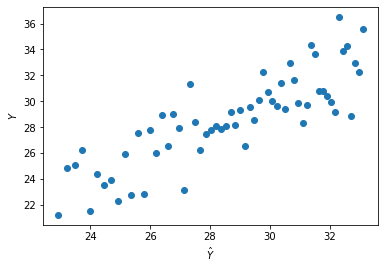

In [5]:
y = result.predict()
plt.scatter(y, Datos['Y'])
plt.xlabel('$\hat{Y}$')
plt.ylabel('$Y$')
plt.show()

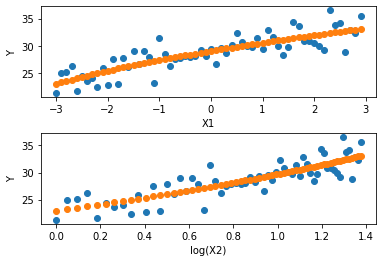

In [6]:
y = result.predict()
plt.subplot(2,1,1)
plt.scatter(Datos['X1'], Datos['Y'])
plt.scatter(Datos['X1'], y)
plt.xlabel('X1')
plt.ylabel('Y')
plt.subplot(2,1,2)
plt.scatter(np.log(Datos['X2']), Datos['Y'])
plt.scatter(np.log(Datos['X2']), y)
plt.xlabel('log(X2)')
plt.ylabel('Y')
plt.subplots_adjust(hspace=0.4)
plt.show()

##### Predecir con nuevos valores

In [7]:
aux1 = np.arange(3,5,0.1)
aux2 = np.arange(4,5,0.05)
Datos_para_pred = pd.DataFrame({'X1': aux1, 'X2': aux2})
Datos_para_pred.index = range(len(Datos),len(Datos) + len(aux1))
Datos_para_pred

,X1,X2
60,3.0,4.00
61,3.1,4.05
62,3.2,4.10
63,3.3,4.15
64,3.4,4.20
65,3.5,4.25
66,3.6,4.30
67,3.7,4.35
68,3.8,4.40
69,3.9,4.45


<IPython.core.display.Javascript object>


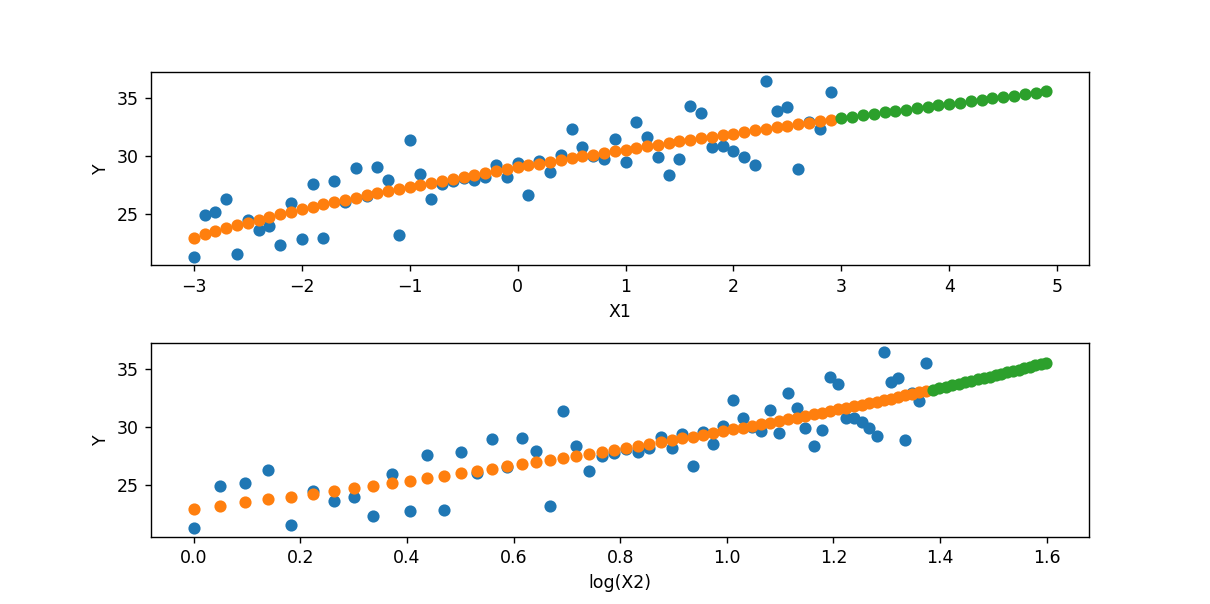

In [8]:
%matplotlib notebook
y = result.predict()
y_ = result.predict(Datos_para_pred)
plt.subplot(2,1,1)
plt.scatter(Datos['X1'], Datos['Y'])
plt.scatter(Datos['X1'], y)
plt.scatter(Datos_para_pred['X1'], y_)
plt.xlabel('X1')
plt.ylabel('Y')
plt.subplot(2,1,2)
plt.scatter(np.log(Datos['X2']), Datos['Y'])
plt.scatter(np.log(Datos['X2']), y)
plt.scatter(np.log(Datos_para_pred['X2']), y_)
plt.xlabel('log(X2)')
plt.ylabel('Y')
plt.subplots_adjust(hspace=0.4)
plt.show()

<IPython.core.display.Javascript object>


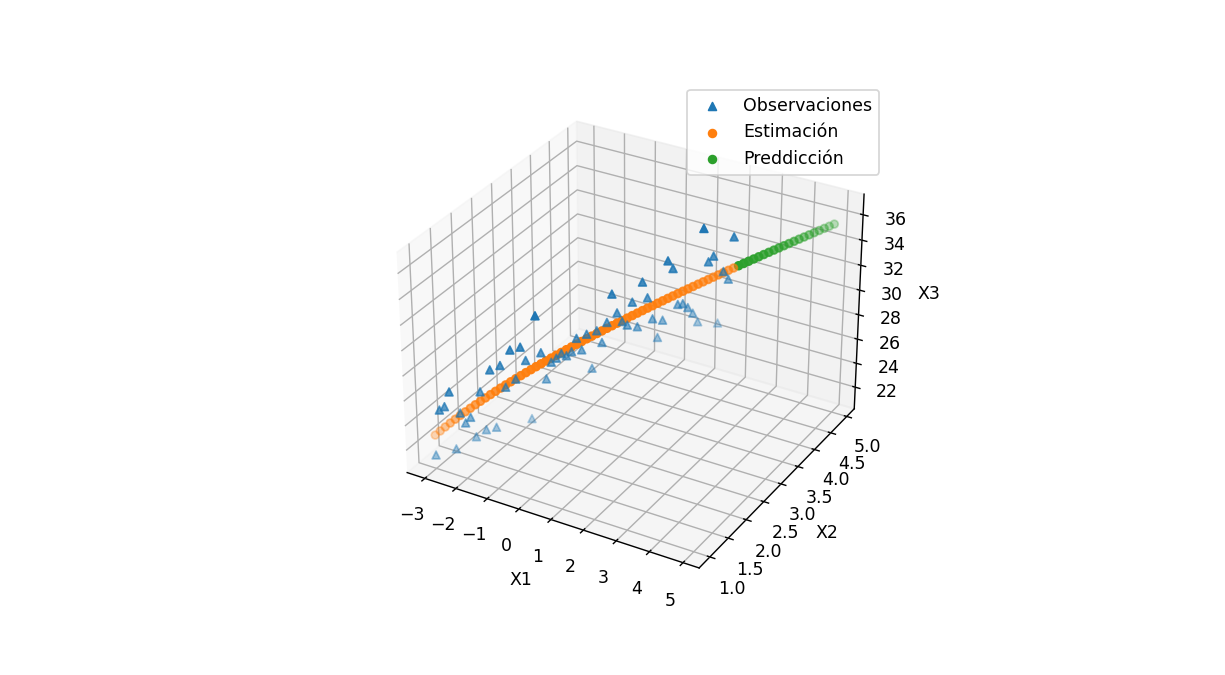

In [9]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(Datos['X1'], Datos['X2'], Datos['Y'], marker='^')
ax.scatter(Datos['X1'], Datos['X2'], y)
ax.scatter(Datos_para_pred['X1'], Datos_para_pred['X2'], y_)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.legend(['Observaciones', 'Estimación', 'Preddicción'])
plt.show()